## **Handwritten Digit Recognition with Neural Network**

In this machine learning project, we will recognize handwritten digits, i.e, numbers from 0-9. This we are going to achieve by modeling a neural network that will have to be trained over a dataset containing images of numbers.

### **What is Handwritten Digit Recognition?**

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
import seaborn as sns

### **Importing the dataset**

The Keras library already contains some datasets and MNIST is one of them. So we can easily import the dataset and start working with it. The mnist.load_data() method returns us the training data, its labels and also the testing data and its labels.

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
y_train = Y_train
y_test = Y_test

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### **Data Visualization**

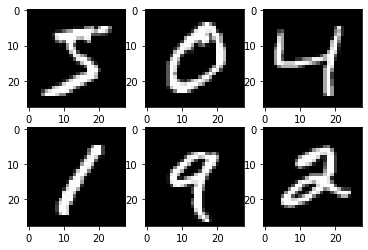

In [3]:
for i in range(6):
    plt.subplot(int('23' + str(i + 1)))
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

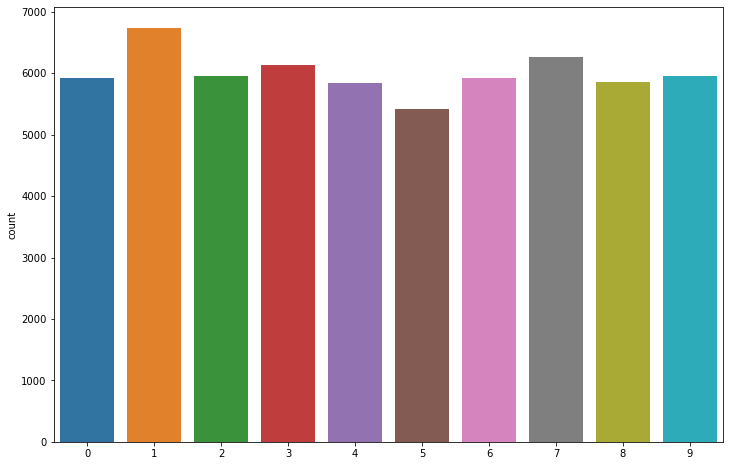

In [4]:
plt.figure(figsize = (12, 8))
sns.countplot(y_train)
plt.show()

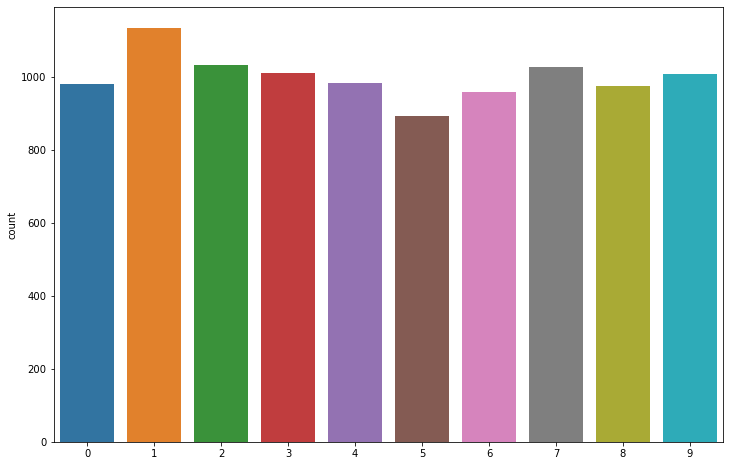

In [5]:
plt.figure(figsize = (12, 8))
sns.countplot(y_test)
plt.show()

### **Data Preprocessing**

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [6]:
# Converting a into a 3D model, We are using 1 as the images are in B/W
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

# Rescaling
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### **Creating the CNN Model**

Now we will create our CNN model in Python data science project. A CNN model generally consists of convolutional and pooling layers. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adam optimizer.

In [9]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              9438208   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)             

In [11]:
hist = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_data = (X_test, Y_test))
print("The Model was successfully trained")

model.save('digit_recognition.h5')
print("Saving the model as mnist_digit_recognition.h5")

Epoch 1/10
469/469 [==============================] - 234s 495ms/step - loss: 0.3125 - accuracy: 0.8996 - val_loss: 0.0395 - val_accuracy: 0.9878
Epoch 2/10
469/469 [==============================] - 217s 462ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 227s 484ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0309 - val_accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 220s 469ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0346 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 226s 482ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0330 - val_accuracy: 0.9912
Epoch 6/10
469/469 [==============================] - 216s 460ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0303 - val_accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 225s 479ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0318 -

### **Model Evaluation**

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

313/313 [==============================] - 12s 37ms/step - loss: 0.0367 - accuracy: 0.9915
Test loss: 0.03666730597615242
Test accuracy: 99.15000200271606


### **Visulaization of the Results**

In [13]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


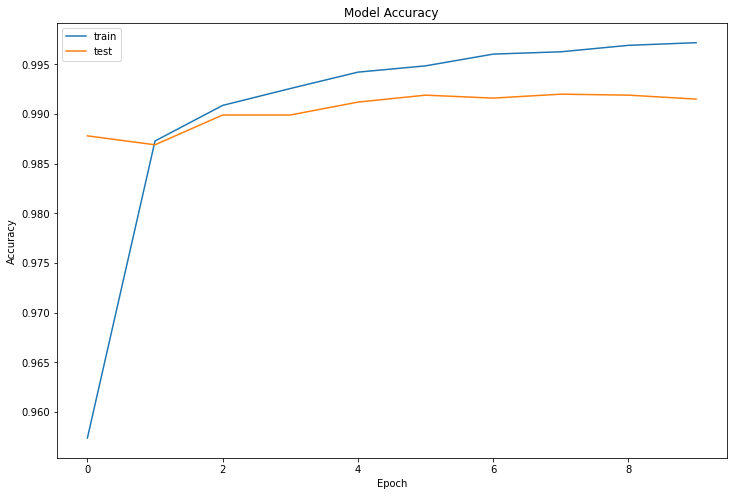

In [14]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

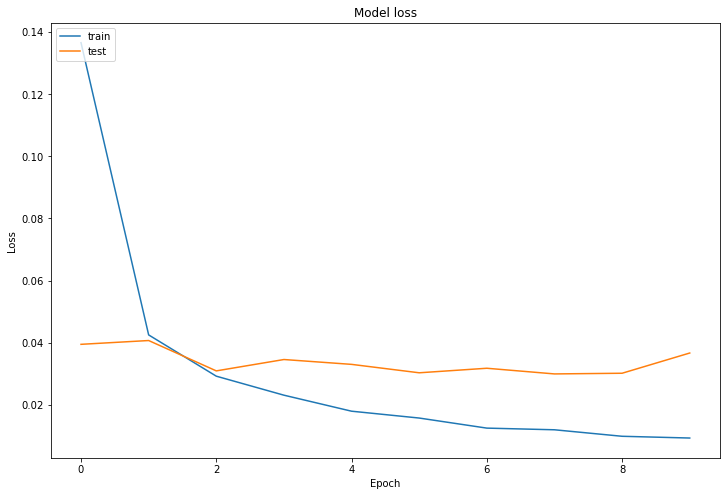

In [15]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()